In [1]:
import numpy as np
import matplotlib.pyplot as plt
import randolph as r

### $\langle O \rangle_{k+1}$ Proof

$$\langle O\rangle_k = \frac{o_1+o_2+...+o_k}{k}$$
$$k\langle O\rangle_k = o_1+o_2+...+o_k$$

$$\langle O\rangle_{k+1} = \frac{o_1+o_2+...+o_k+o_{k+1}}{k+1}$$
$$\langle O\rangle_{k+1} = \frac{k\langle O\rangle_k+o_{k+1}}{k+1}$$
$$\langle O\rangle_{k+1} = \frac{k\langle O\rangle_k+o_{k+1}+\langle O\rangle_k-\langle O\rangle_k}{k+1}$$
$$\langle O\rangle_{k+1} = \frac{(k+1)\langle O\rangle_k+o_{k+1}-\langle O\rangle_k}{k+1}$$
$$\langle O\rangle_{k+1} = \langle O\rangle_k+\frac{1}{k+1}\left(o_{k+1}-\langle O\rangle_k\right)$$


### Simulate a Biased Coin

C:\Users\Steph\180N Projects\randolph.py:292: RuntimeWarning: divide by zero encountered in double_scalars
  p_accept =  min(1., p[S_n] / p[int(S[i - 1])])


KeyboardInterrupt: 

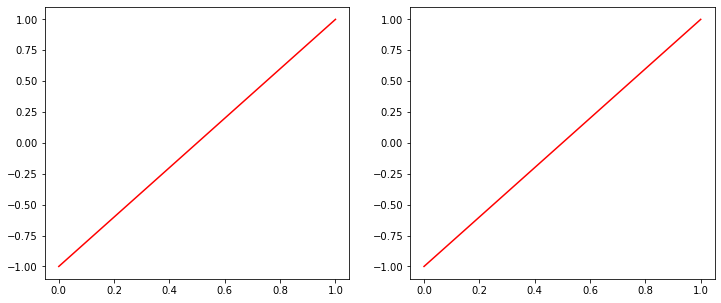

In [5]:
#The plots and arrays are initialized for future updates
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
beta = np.linspace(0, 1, 20)
coin_sim = np.array([np.zeros(np.shape(beta)), np.zeros(np.shape(beta))])

#The values for the theoretical earnings are plotted on each graph for comparison
ax[0].plot(beta, r.average_earnings_per_flip(beta), 'r-', label = 'Theoretical Earnings')
ax[1].plot(beta, r.average_earnings_per_flip(beta), 'r-', label = 'Theoretical Earnings')

#The weighted coin simulation is ran with varying betas over 1000 and 1000000 steps
for i in range(np.shape(beta)[0]):
    coin_sim[0][i] = r.weighted_coin(beta[i], 1000, plot = False)
    coin_sim[1][i] = r.weighted_coin(beta[i], 1000000, plot = False)
    

#The simulated values are plotted
ax[0].plot(beta, coin_sim[0], 'k-', label = 'Simulated Earnings')
ax[1].plot(beta, coin_sim[1], 'k-', label = 'Simulated Earnings')

#Axes are labelled and plots are titled
ax[0].set_title('Earnings vs Beta (after 1000 flips)')
ax[0].set_xlabel('Beta')
ax[0].set_ylabel('Earnings')
ax[1].set_title('Earnings vs Beta (after 1000000 flips)')
ax[1].set_xlabel('Beta')
ax[1].set_ylabel('Earnings')


ax[0].legend()
ax[1].legend()
plt.show()

### Simulate a Weighted Die

In [ ]:
#Values and arrays are initialized
n = 10
dE = np.zeros(1)

E = r.weighted_die(3, n, sides = 2)
dE[0] = E
i = 0

#The weighted die simulation is ran 100 times with the number of rolls increasing by 10 each iteration
while i < 500:
    i += 1
    n += 10
    #The average earnings are found given varying number of rolls and the difference between that value and the previous is 
    #saved
    E_n = r.weighted_die(3, n, sides = 2)
    dE = np.concatenate((dE, np.array([np.abs(E_n - E)])))
    E = E_n

        
#The difference in average earnings between increasing numbers of rolls is plotted with a horizontal line at y = 0.01 to 
#show where dE tends below that value 
N = np.linspace(10, n, i + 1)
fig, ax = plt.subplots()
ax.plot(N, dE, 'k-', label = 'Difference Between Average Earnings')
ax.axhline(y = .01, color = 'r', label = '$0.01')
ax.set_xlabel('Number of Rolls')
ax.set_ylabel('Difference of Average Earnings between Rolls')
ax.set_title('Difference of Average Earnings vs Number of Rolls')


print('After 5000 rolls, the difference between the theoretical and simulated earnings is: '+str(np.abs(E-r.average_earnings_per_roll(3,sides=2))))


ax.legend()
plt.show()


#On average, the earnings seem to converge around 3000 rolls

### Plotting Time Series of Intensive Quantities

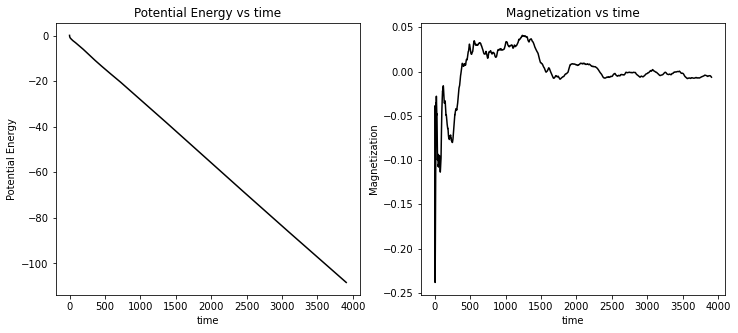

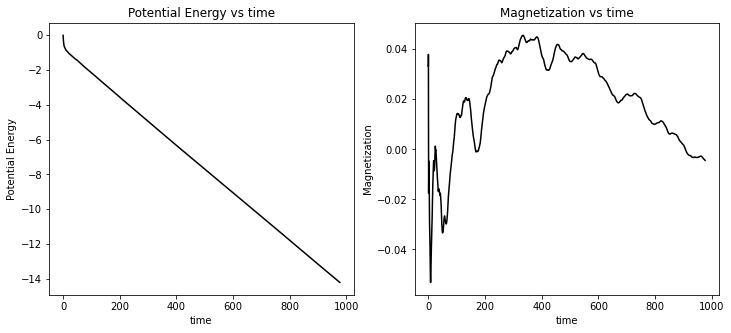

In [21]:
N = 1000000
T = 3

#The ising models for L = 16 and L = 32 are created
L1 = 16
L2 = 32
R1 = r.two_dim_ising(L1, T, N)
R2 = r.two_dim_ising(L2, T, N)

#The values for t are calculated for each graph
t1 = np.linspace(0, N / L1 ** 2, N + 1)
t2 = np.linspace(0, N / L2 ** 2, N + 1)

#Plots are initialized
fig, ax1 = plt.subplots(1, 2, figsize = (12, 5))
fig, ax2 = plt.subplots(1, 2, figsize = (12, 5))

#The potential energy and magnetization are plotted vs time for a 16x16 ising model
ax1[0].plot(t1, R1[1], 'k-')
ax1[1].plot(t1, R1[2], 'k-')
ax1[0].set_title('Potential Energy vs time')
ax1[1].set_title('Magnetization vs time')
ax1[0].set_xlabel('time')
ax1[0].set_ylabel('Potential Energy')
ax1[1].set_xlabel('time')
ax1[1].set_ylabel('Magnetization')

#The potential energy and magnetization are plotted vs time for a 32x32 ising model
ax2[0].plot(t2, R2[1], 'k-')
ax2[1].plot(t2, R2[2], 'k-')
ax2[0].set_title('Potential Energy vs time')
ax2[1].set_title('Magnetization vs time')
ax2[0].set_xlabel('time')
ax2[0].set_ylabel('Potential Energy')
ax2[1].set_xlabel('time')
ax2[1].set_ylabel('Magnetization')


plt.show()


#It looks like for the 16x16 lattice, the magnetization seems to converge at 1500; for the 32x32 lattice, it converges at 
#around 1000.  Neither of the energies converge (which I feel is impossible, so there's likely an issue in my ising function)
#Both convergence values seem fairly close, so as long as we define t = steps/sites, then it should converge at the same value; 
#otherwise, the time of convergence does depend on the system size, where it takes longer for the system to converge

### Magnetization Curves for Different Lattice Sizes

In [22]:
T_c = 2.2692
N = 1000000
nT = 20

#The theoretical function for magnetization vs temperature is defined
def M(T):
    return (1 - 1 / np.sinh(2 / T) ** (4)) ** (1 / 8)

#Temperatures and magnetization arrays are initialized
T = np.linspace(.01, 5, nT + 1)
M8 = np.zeros(nT + 1)
M16 = np.zeros(nT + 1)
M32 = np.zeros(nT + 1)
M64 = np.zeros(nT + 1)

#Values for the magnetization of different LxL lattices given varying temperature values are found using the ising model
for i in range(nT + 1):
    L = 8
    M8[i] = np.abs(r.two_dim_ising(L, T[i], N)[2][N])
    
    L = 16
    M16[i] = np.abs(r.two_dim_ising(L, T[i], N)[2][N])

    L = 32
    M32[i] = np.abs(r.two_dim_ising(L, T[i], N)[2][N])

    L = 64
    M64[i] = np.abs(r.two_dim_ising(L, T[i], N)[2][N])

#The magnetization vs temperature graph is initialized and the values are plotted
fig, ax = plt.subplots()
ax.set_title('Magnetization vs Temperature With Varying Lattice Sizes')
ax.set_ylabel('Magnetization')
ax.set_xlabel('Temperature')

ax.plot(T, M8, 'b-', label = 'L = 8')
ax.plot(T, M16, 'r-', label = 'L = 16')
ax.plot(T, M32, 'g-', label = 'L = 32')
ax.plot(T, M64, 'y-', label = 'L = 64')

#The values for the theoretical magnetization vs temperature are found and then plotted using a piecewise function
T = np.linspace(0.1, 5, 1000)
M = np.piecewise(T, [T < T_c, T >= T_c], [lambda T: M(T), 0])
ax.plot(T, M, 'k-', label = 'Theoretical')


ax.legend()
plt.show()


#The magnetization for smaller-sized systems seems to follow the theoretical curve well. However, the larger the system,
#the worse it fits. I believe this is because of the number of steps I'm using. Larger systems require more steps for 
#convergence

KeyboardInterrupt: 

### Typical Spin Configuration at Different Temperatures

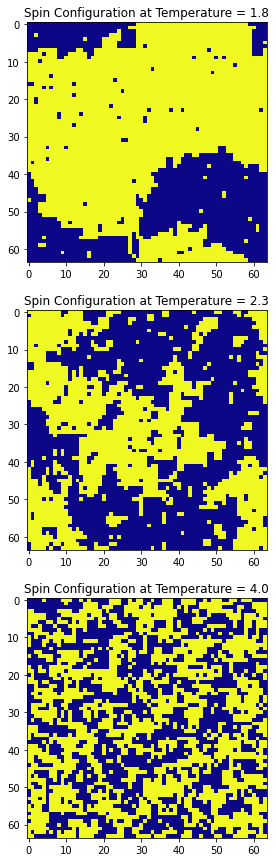

In [19]:
L = 64
steps = 1000000

#The spin configurations of 64x64 lattices are found at different temperatures
S1 = r.two_dim_ising(L, 1.8, steps)[0]
S2 = r.two_dim_ising(L, 2.3, steps)[0]
S3 = r.two_dim_ising(L, 4.0, steps)[0]

#The spin configurations are plotted using a heatmap, where blue is down spin and yellow is up spin
#Also, plasma color map because a plasma physicist gotta appreciate a plasma colormap, ya know?
fig, heatmap = plt.subplots(3, figsize = (5, 15))
heatmap[0].imshow(S1, cmap = 'plasma')
heatmap[1].imshow(S2, cmap = 'plasma')
heatmap[2].imshow(S3, cmap = 'plasma')

heatmap[0].set_title('Spin Configuration at Temperature = 1.8')
heatmap[1].set_title('Spin Configuration at Temperature = 2.3')
heatmap[2].set_title('Spin Configuration at Temperature = 4.0')


plt.show()


#After running the simulation many times, it appears the lower the temperature is, the more the system prefers one spin 
#configuration. At higher temperatures, the spin configuration is more random and chaotic. This shows that when more 
#kinetic energy is in the system, the more states it can take. Lower temperatures won't have enough energy to "kick" 
#states out of the preferred state. 